***Homework 2***

*The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc. Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.*

In [1]:
# Importing data
import pandas as pd
import numpy as np

names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]
# To do 1: Complete the code
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",header=None,delim_whitespace=True, names=names,na_values='?')

In [2]:
# To do 2 : Display the first six rows of the data frame

df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


***Basic Manipulations of the data***

In [3]:
# TODO 3: What is the shape of the data? How many attributes are there? How many samples?
df.shape


(506, 14)

In [4]:
d=len(df.columns)


In [5]:
e=len(df.index)

In [6]:
print("num samples={0:5.1f}, num attributes={1:5.1f}".format(d,e))

num samples= 14.0, num attributes=506.0


The shape of the data is (506,14)
The number of samples is 506 and the number of attributes is 14

In [7]:
# TODO 4: Create a response vector y with the values in the column PRICE

y=df['PRICE']
y.head(15)


0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
5     28.7
6     22.9
7     27.1
8     16.5
9     18.9
10    15.0
11    18.9
12    21.7
13    20.4
14    18.2
Name: PRICE, dtype: float64

In [8]:
# TODO 5: Use the response vector y to find the mean house price in thousands and the fraction of homes that are above $40k
ny=np.mean(y)
ny_mean=np.array(df['PRICE'])  # converting into an array
ny_40k=(np.mean(y>40))*100
print("The mean house price is{0:7.2f} thousands of dollars, Only {1:7.2f} percent are above $40k".format(ny,ny_40k))

The mean house price is  22.53 thousands of dollars, Only    6.13 percent are above $40k


***Visualizing the data***

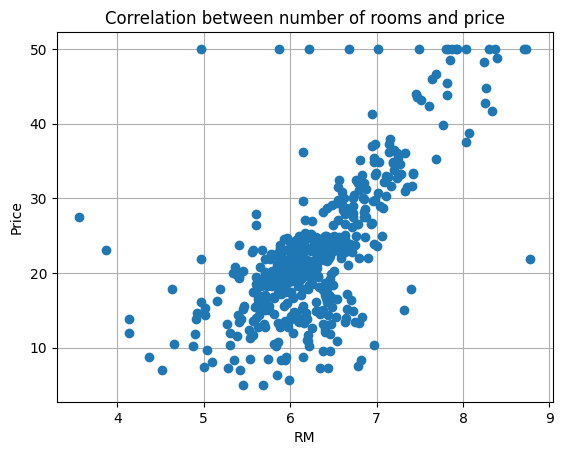

In [9]:
import matplotlib
import matplotlib.pyplot as plt

# TODO 6: create a predictor vector x containing the values in the RM column

x=np.array(df['RM'])
y=np.array(df['PRICE'])
 #TODO 7: Create a scatter plot of the price vs. the RM attribute. Make sure your plot has grid lines and label the axes with
x=np.array(df['RM'])
y=np.array(df['PRICE'])
plt.plot(x,y,'o')
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('Correlation between number of rooms and price')
plt.grid(True)


***Fitting a Simple Linear Model***
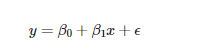

In [10]:
 # TODO 8: complete the following code
    # beta0 = ...
    # beta1 = ...
    # rsq = ...
def fit_linear(x,y):
  xm=np.mean(x)
  ym=np.mean(y)
  syy=np.mean((y-ym)**2)
  syx=np.mean((y-ym)*(x-xm))
  sxx=np.mean((x-xm)**2)
  beta1=syx/sxx
  beta0=ym-beta1*xm
  yhat=beta0+beta1*x
  rsq=np.mean((y-yhat)**2)
  return beta0, beta1,rsq

In [11]:
# TODO 9: print the values beta0, beta1 and rsq for the linear model of price vs. number of rooms.
result=fit_linear(x,y)
print("The value of beta0 is={0:7.2f}, The value of beta 1 is={1:7.2f}, The value of RSS is={2:7.2f}".format(result[0],result[1],result[2]))

The value of beta0 is= -34.67, The value of beta 1 is=   9.10, The value of RSS is=  43.60


In [12]:
# TODO 10: Replot the scatter plot above, but now with the regression line.


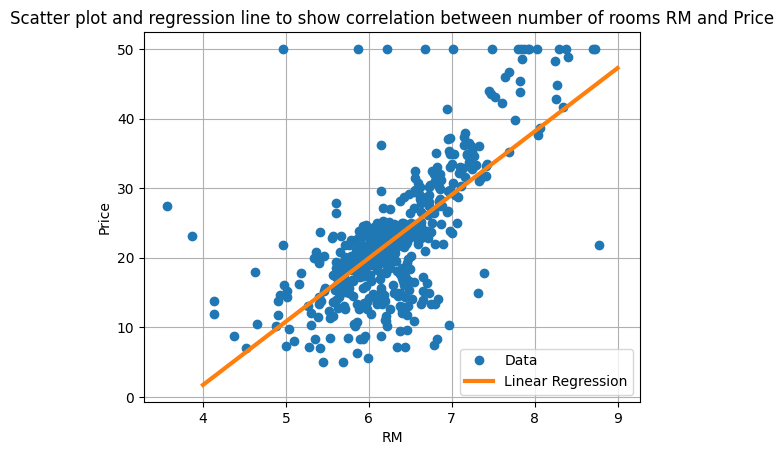

In [13]:
import matplotlib
import matplotlib.pyplot as plt
result=fit_linear(x,y)
xp=np.linspace(4,9)
yp=result[1]*xp+result[0]
plt.plot(x,y,'o')
plt.plot(xp,yp,'-',linewidth=3)
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('Scatter plot and regression line to show correlation between number of rooms RM and Price')
plt.grid(True)
plt.legend(['Data','Linear Regression'])

***Another Approach of Linear Regression***

image.png

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x_new=np.array([x]).reshape((-1,1))
model.fit(x_new,y)

LinearRegression()

In [15]:
model=LinearRegression().fit(x_new,y)
r_sq=model.score(x_new,y)
print(f"Coefficient of determination:{r_sq}")

Coefficient of determination:0.48352545599133423


In [16]:
print(f"intercept:{model.intercept_}")


intercept:-34.67062077643857


In [17]:
print(f"slope:{model.coef_}")

slope:[9.10210898]


In [18]:
# Predictor Response
y_pred=model.predict(x_new)
print(f"predicted response:\n{y_pred}")

predicted response:
[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.559

**Compute Coefficients of Determination**

In [19]:
# TODO 11:  compute the 𝑅^2 values for all the predictors and output the values in a table.

df.iloc[1]

# assigning the np.array
x1=np.array(df['CRIM'])
x2=np.array(df['ZN'])
x3=np.array(df['INDUS'])
x4=np.array(df['CHAS'])
x5=np.array(df['NOX'])
x6=np.array(df['AGE'])
x7=np.array(df['DIS'])
x8=np.array(df['RAD'])
x9=np.array(df['TAX'])
x10=np.array(df['PTRATIO'])
x11=np.array(df['B'])
x12=np.array(df['LSTAT'])

# defining the r_square function
def r_square(x1,y):
  xm1=np.mean(x1)
  ym=np.mean(y)
  syy1=np.mean((y-ym)**2)
  syx1=np.mean((y-ym)*(x1-xm1))
  sxx1=np.mean((x1-xm1)**2)
  beta11=syx1/sxx1
  beta01=ym-beta11*xm1
  yhat1=beta01+beta11*x1
  rsq1=np.mean((y-yhat1)**2)
  return beta01, beta11,rsq1

r_sq_1=r_square(x1,y)
r_sq_2=r_square(x2,y)
r_sq_3=r_square(x3,y)
r_sq_4=r_square(x4,y)
r_sq_5=r_square(x5,y)
r_sq_6=r_square(x6,y)
r_sq_7=r_square(x7,y)
r_sq_8=r_square(x8,y)
r_sq_9=r_square(x9,y)
r_sq_10=r_square(x10,y)
r_sq_11=r_square(x11,y)
r_sq_12=r_square(x12,y)


print("The r_square of CM1 is:{0:7.2f}".format(r_sq_1[2]))
print("The r_square of ZN is:{0:7.2f}".format(r_sq_2[2]))
print("The r_square of INDUS is:{0:7.2f}".format(r_sq_3[2]))
print("The r_square of CHAS is:{0:7.2f}".format(r_sq_4[2]))
print("The r_square of NOX is:{0:7.2f}".format(r_sq_5[2]))
print("The r_square of AGE is:{0:7.2f}".format(r_sq_6[2]))
print("The r_square of DIS is:{0:7.2f}".format(r_sq_7[2]))
print("The r_square of RAD is:{0:7.2f}".format(r_sq_8[2]))
print("The r_square of TAX is:{0:7.2f}".format(r_sq_9[2]))
print("The r_square of PTRATIO is:{0:7.2f}".format(r_sq_10[2]))
print("The r_square of B is:{0:7.2f}".format(r_sq_11[2]))
print("The r_square of LSTAT is:{0:7.2f}".format(r_sq_12[2]))


#df.iloc[1]

The r_square of CM1 is:  71.69
The r_square of ZN is:  73.45
The r_square of INDUS is:  64.67
The r_square of CHAS is:  81.83
The r_square of NOX is:  69.00
The r_square of AGE is:  72.42
The r_square of DIS is:  79.15
The r_square of RAD is:  72.12
The r_square of TAX is:  65.89
The r_square of PTRATIO is:  62.65
The r_square of B is:  75.03
The r_square of LSTAT is:  38.48
